# 2. NOMA Layer Simulation
## 2.1 Imports and Setup
## 2.2 Power Allocation Logic
## 2.3 Signal Generation for Two Users
## 2.4 Channel Model (AWGN)
## 2.5 Receiver with SIC
## 2.6 BER Analysis for Both Users
## 2.7 Plot BER vs SNR
## 2.8 Save Results for Paper

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def power_allocation(P_total=1.0, alpha=0.8):
    P1 = alpha * P_total  # Strong user
    P2 = (1 - alpha) * P_total  # Weak user
    return P1, P2

In [10]:
def generate_noma_signal(bits1, bits2, P1, P2):
    x1 = np.sqrt(P1) * (2 * bits1 - 1)  # BPSK
    x2 = np.sqrt(P2) * (2 * bits2 - 1)
    return x1 + x2

In [11]:
def awgn(signal, snr_db):
    snr_linear = 10**(snr_db / 10)
    power = np.mean(np.abs(signal)**2)
    noise_power = power / snr_linear
    noise = np.sqrt(noise_power / 2) * np.random.randn(*signal.shape)
    return signal + noise

In [12]:
def sic_receiver(y, P1, P2):
    # Decode strong user first
    x1_hat = np.sign(y)
    # Subtract strong user signal
    y_residual = y - np.sqrt(P1) * x1_hat
    # Decode weak user
    x2_hat = np.sign(y_residual)
    return x1_hat, x2_hat

In [13]:
def calculate_ber(original, decoded):
    return np.sum(original != decoded) / len(original)

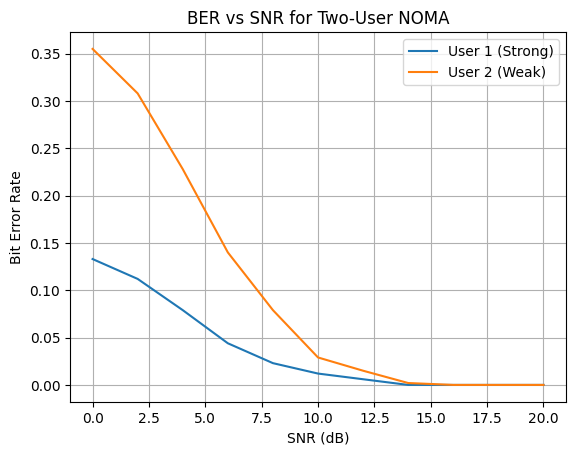

In [14]:
snr_range = np.arange(0, 21, 2)
ber_user1 = []
ber_user2 = []

for snr in snr_range:
    bits1 = np.random.randint(0, 2, 1000)
    bits2 = np.random.randint(0, 2, 1000)
    P1, P2 = power_allocation()
    tx = generate_noma_signal(bits1, bits2, P1, P2)
    rx = awgn(tx, snr)
    x1_hat, x2_hat = sic_receiver(rx, P1, P2)
    ber_user1.append(calculate_ber(bits1, (x1_hat > 0).astype(int)))
    ber_user2.append(calculate_ber(bits2, (x2_hat > 0).astype(int)))

plt.plot(snr_range, ber_user1, label='User 1 (Strong)')
plt.plot(snr_range, ber_user2, label='User 2 (Weak)')
plt.title("BER vs SNR for Two-User NOMA")
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate")
plt.legend()
plt.grid(True)
plt.savefig("../plots/noma_ber_vs_snr.png")
plt.show()